**Nesta seção, vamos aprender alguns conceitos básicos sobre Machine Learning**

Após a introdução a Scikit-Learn apresentada, o objetivo agora é compreender a diferença entre aprendizado **Supervisionado** e **Não supervisionado**.

### Aprendizado Supervisionado

Vamos explorar um pouco mais problemas de *Classificação* e *Regressão*.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import seaborn; seaborn.set()

In [3]:
from sklearn.linear_model import LinearRegression

Para mais referências, acesse este [link](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [4]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [5]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


Retomando o exemplo sobre Regressão:

In [6]:
x = np.arange(10)
y = 2 * x + 1

In [7]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


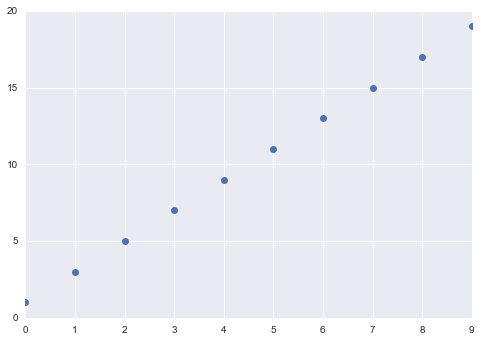

In [8]:
plt.plot(x, y, 'o');

In [10]:
# Dataset retirado do sklearn 2D: (amostras = 3 x features = 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [12]:
# Treinar o modelo a partir de amostras conhecidas
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [14]:
# underscore no final indica um parâmetro do modelo ajustado
print(model.coef_)
print(model.intercept_)

[ 2.]
1.0


In [18]:
# erro residual ajustado durante o treino
model.residues_

/Users/asivole/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


7.6200430943719212e-31

### Em aprendizados Supervisionados...

* Conjunto de dados possui atributos e etiquetas (labels, outputs, respostas)
* Modelo aprende com dados existentes, através de respostas conhecidas

Alguns exemplos deste tipo de aprendizado:
* Classificação da Iris
* Identificação de pessoas em uma foto (Facebook tagging)
* Sistemas de recomendação (Netflix, Spotify)
* Avaliação de custo de imóveis (California Housing)


Fazem parte de aprendizados supervisionados:
* Classificação (saída é discreto)
* Regressão (saída é contínuo)

#### Exemplo de Classificação

In [20]:
# KNN k-nearest neighbor
# http://scikit-learn.org/stable/modules/neighbors.html
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# Cria modelo
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# Treina modelo
knn.fit(X, y)

# Que tipo de iris possui 3 cm x 5 cm de sepala e 4 cm x 2 cm de pétala?
# Chamando o preditor do modelo treinado
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


Podemos ter também probabilidade entre classes:

In [23]:
print (iris.target_names)
knn.predict_proba([[3, 5, 4, 2],])

['setosa' 'versicolor' 'virginica']


array([[ 0. ,  0.8,  0.2]])

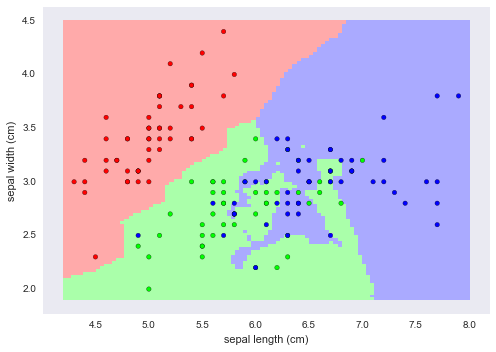

In [24]:
from fig_code import plot_iris_knn
plot_iris_knn()

**Exercício Relâmpago**
Vamos usar um estimador diferente para treinar o modelo no mesmo problema: sklearn.svm.SVC

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Você não necessariamente precisa saber o que é isso para utiliza-lo. Estamos apenas experimentando interfaces.

Se você terminar cedo, tente gerar um plot similar ao anterior para este novo modelo.

In [26]:
from sklearn.svm import SVC

#### Exemplo de Regressão

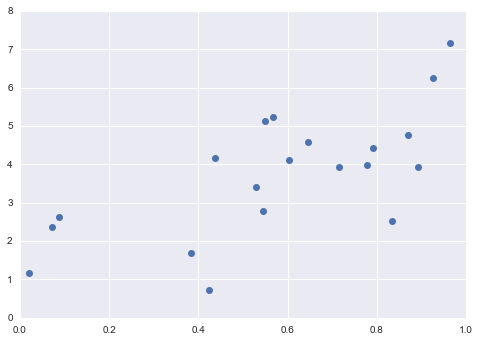

In [29]:
# Gerando dados aleatorios
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

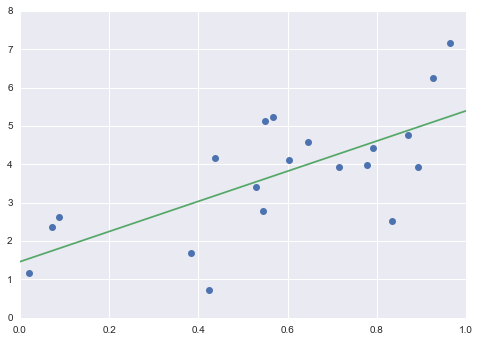

In [34]:
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

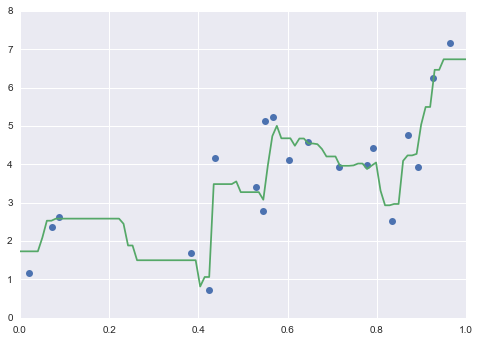

In [31]:
# Podemos tentar modelos mais sofisticados
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

** Exercício **

Vamos explorar o RandomForestRegressor acessando o 'help'.

Coloque um '*?*' após o objeto instanciado.

Quais argumentos estão disponíveis para RandomForestRegressor?

Como tais argumentos alteram o gráfico gerado?

Esses argumentos são conhecidos como **hiper-parâmetros**. Nós os discutiremos mais adiante como ajusta-los na seção de validação.

In [36]:
RandomForestRegressor?

### Aprendizado Não-Supervisionado

Vamos explorar problemas de *Redução de Dimensões* e *Clusterização*

Em aprendizados não-supervisionados...
* Conjunto de dados só possui atributos, mas não contém respostas
* Estamos interessados em encontrar similaridades entre as amostras (encotrar classes?)

Alguns exemplos deste tipo de aprendizado:
* Separação de fontes
* Dado um FAQ, separar qual o assunto relacionado

Em alguns casos, podemos combinar os aprendizados. Podemos utilizar o aprendizado não-supervisionado para encontrar *features* mais relevantes e a partir daí, treinar um modelo utilizando aprendizado supervisionado.


#### Redução de Dimensões: PCA

(Análise de Componentes Principais). Esta técnica pode servir para encontrar quais são os atributos mais relevantes em um determinado conjunto de dados.

Como a gente não consegue plotar o conjunto iris num gráfico 2D (pois temos 4 dimensões), com PCA podemos tentar extrair os 2 atributos mais relevantes.

Reduzindo o formato do conjunto: (150, 2)
Relevância dos 2 componentes:
0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.176 x petal length (cm) + -0.075 x petal width (cm)


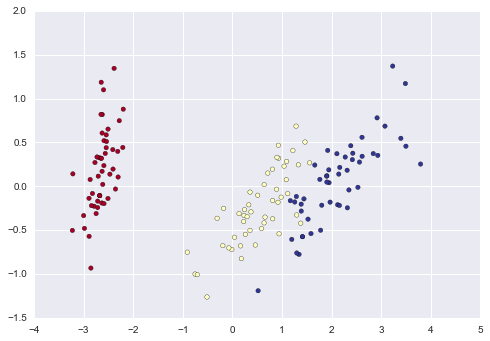

In [37]:
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduzindo o formato do conjunto:", X_reduced.shape)

import pylab as pl
pl.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=y,
    cmap='RdYlBu'
)

print("Relevância dos 2 componentes:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

#### Clustering: k-means
*Clusterizar* significa agrupar amostrar com atributos homogêneos, de acordo com algum critério, encontrando padrões no conjunto de dados.

Provavelmente, esta técnica permite a descoberta de estruturas escondidas e que só ficam evidentes ao utilizar tal algorítmo.

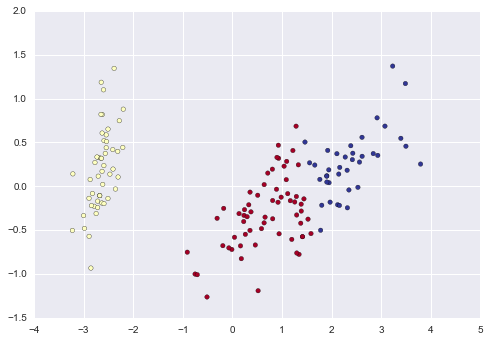

In [38]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(X)
y_pred = k_means.predict(X)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu');

#### Recapitulando

Scikit-Learn possui uma interface uniforme para todos os métodos
* Para **todos** os métodos de aprendizado:
> * model.fit(X, [y])
* Para aprendizado **Supervisionado**:
> * model.predict([nova_amostra]) 
> * model.predict_proba(): disponível apenas para alguns problemas de **classificação**
> * model.score(): Indica, entre 0 e 1, qual modelo melhor generaliza
* Para aprendizado **Não Supervisionado**
> * model.predict(): 'Prevê' classes em algoritmos de clusterização
> * model.transform([X_new])
> * model.fit_transform()

### Validando modelos treinados

In [39]:
from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)
print(np.all(y == y_pred))

True


![confmatrix](../images/confmatrix.png)

In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [41]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

[[12  0  0]
 [ 0  6  0]
 [ 0  2 18]]


/Users/asivole/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Como escolher o melhor modelo

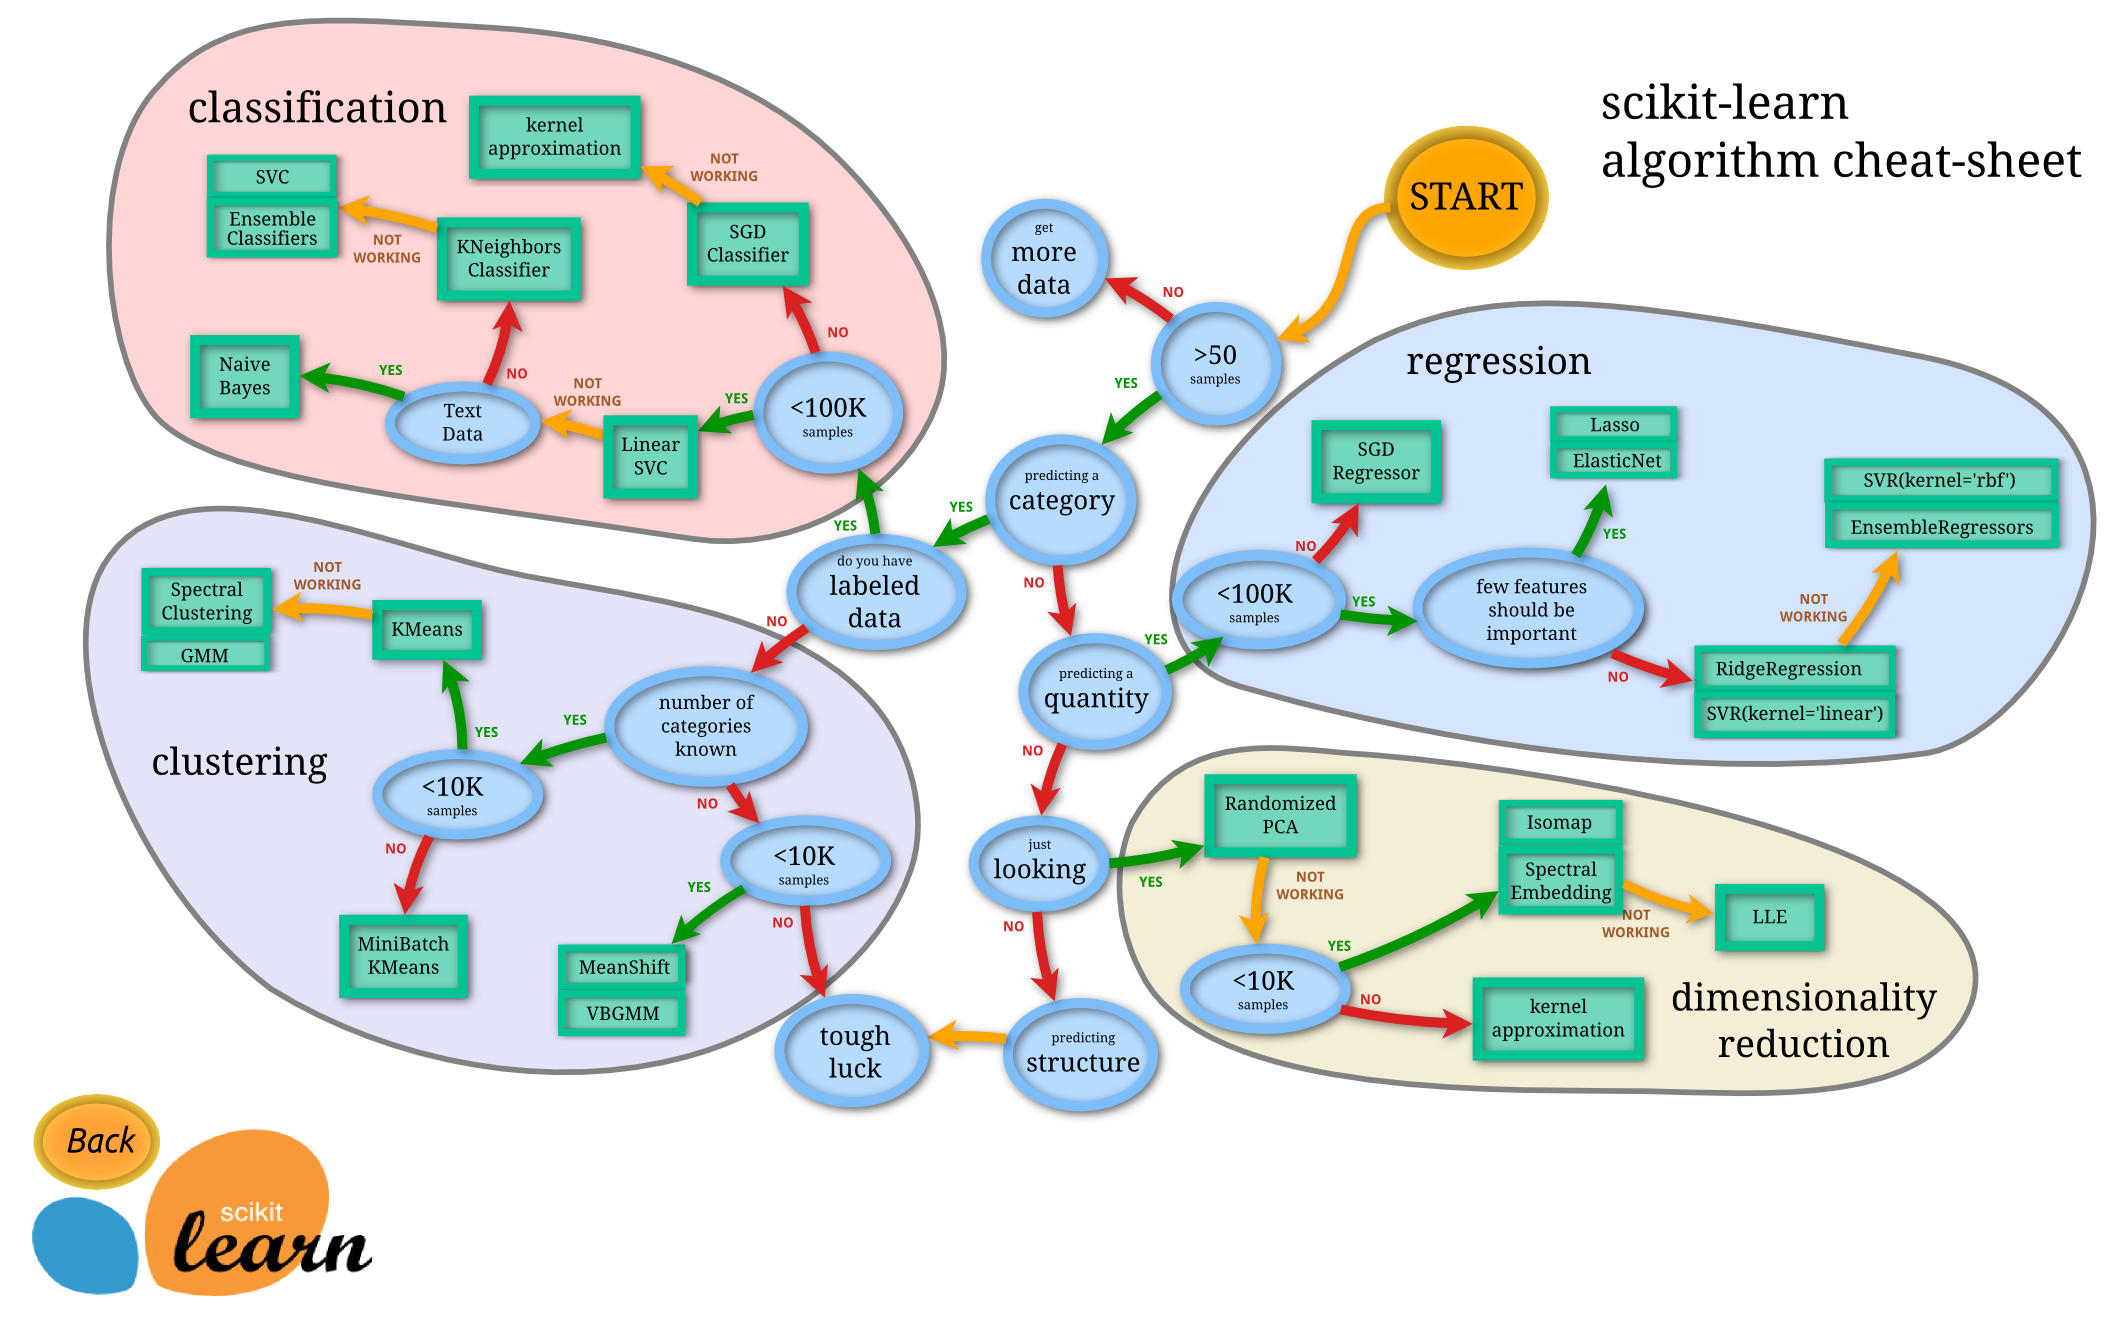

In [42]:
from IPython.display import Image
Image("http://scikit-learn.org/dev/_static/ml_map.png")

#### Outras Aplicações

In [43]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

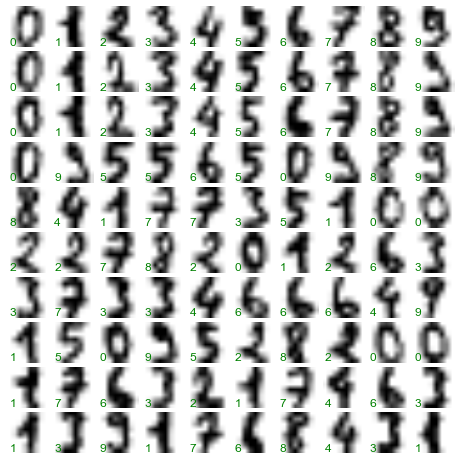

In [44]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

In [45]:
# Imagens traduzidas em grid 8x8
print(digits.images.shape)
print(digits.images[0])

(1797, 8, 8)
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [46]:
# Como isso serve de entrada para treinar nossos modelos
print(digits.data.shape)
print(digits.data[0])

(1797, 64)
[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


In [47]:
# Alvos...
print(digits.target)

[0 1 2 ..., 8 9 8]


#### Vamos reduzir o número de dimensões?

In [55]:
from sklearn.manifold import Isomap

In [56]:
iso = Isomap(n_components=2)
data_projected = iso.fit_transform(digits.data)

In [57]:
data_projected.shape

(1797, 2)

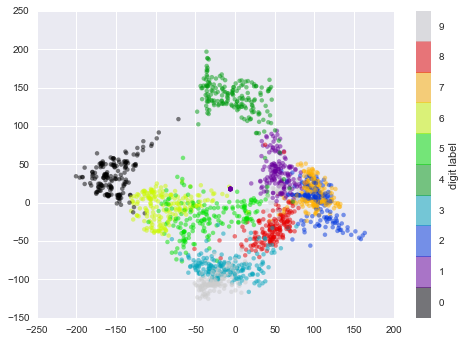

In [58]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

É possível perceber que as amostras possuem grupos e talvez possamos tratar este problema como de Classificação

In [60]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    digits.data,
    digits.target,
    random_state=2
)
print(Xtrain.shape, Xtest.shape)

(1347, 64) (450, 64)


In [61]:
# Utilizando Regressão Logística como modelo classificador (embora o nome confunda um pouco)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

In [62]:
# Obtendo acurácia, que não nos diz muita coisa, mas...
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.94666666666666666

In [64]:
# Obtendo Matriz de Confusão, que nos indica onde estamos errando mais
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, ypred))

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  3  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  2  0  3  1  0]
 [ 0  2  0  0 36  0  0  0  1  1]
 [ 0  0  0  0  0 52  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  2  0  0  0  0  0  0 38  0]
 [ 0  0  0  1  0  1  0  1  2 34]]


/Users/asivole/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


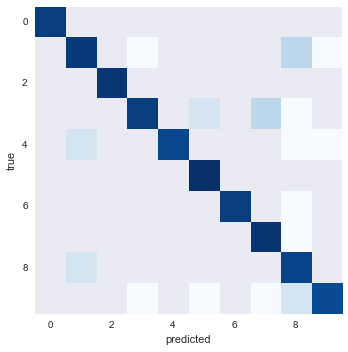

In [66]:
plt.imshow(
    np.log(confusion_matrix(ytest, ypred)),
    cmap='Blues',
    interpolation='nearest'
)
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted')

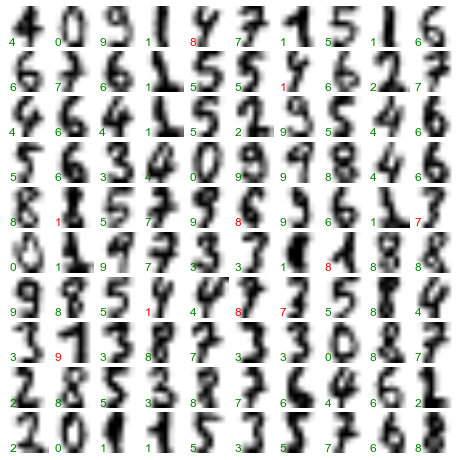

In [67]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(ypred[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == ypred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])